# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [1]:
from sklearn.svm import SVC
import numpy as np

from itertools import combinations
from itertools import permutations
from itertools import product

In [2]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(d, n, S_n):
    
    for r in range(1, n//2+1):        
        for comb in combinations(range(n), r):
            y = [1 if i in comb else 0 for i in range(n)]
            if SVC(C=1e5, shrinking=False, kernel='linear', tol=1e-5).fit(S_n,y).score(S_n, y) != 1:
                return False
    return True
        
        

In [13]:
S_n = np.array([[1,2],[2,8], [4,4], [10,10]])


is_shattered(2, 4, S_n)

False

### c)

In [14]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

In [15]:
import matplotlib.pyplot as plt

In [18]:
def is_shattered2(d, n, S_n):
    fig, ax = plt.subplots(6, 2, figsize=(9, 20))
    for r in range(1, n//2+1):        
        for j, comb in enumerate(combinations(range(n), r)):
            print(r, j, comb)
            y = [1 if i in comb else 0 for i in range(n)]
            ax[j, r-1].scatter(S_n[:,:1], S_n[:,1:2], c=y)
            svc = SVC(C=1e5, shrinking=False, kernel='linear', tol=1e-5).fit(S_n,y)
            w = svc.coef_[0]
            b = svc.intercept_[0]
            x_points = np.linspace(0, 10)
            y_points = -(w[0] / w[1]) * x_points - b / w[1]
            if r-1 == 1 and (j == 2 or j==3):
                ax[j, r-1].plot(x_points, y_points, c='r')
            else:
                ax[j, r-1].plot(x_points, y_points, c='b')

1 0 (0,)
1 1 (1,)
1 2 (2,)
1 3 (3,)
2 0 (0, 1)
2 1 (0, 2)
2 2 (0, 3)
2 3 (1, 2)
2 4 (1, 3)
2 5 (2, 3)


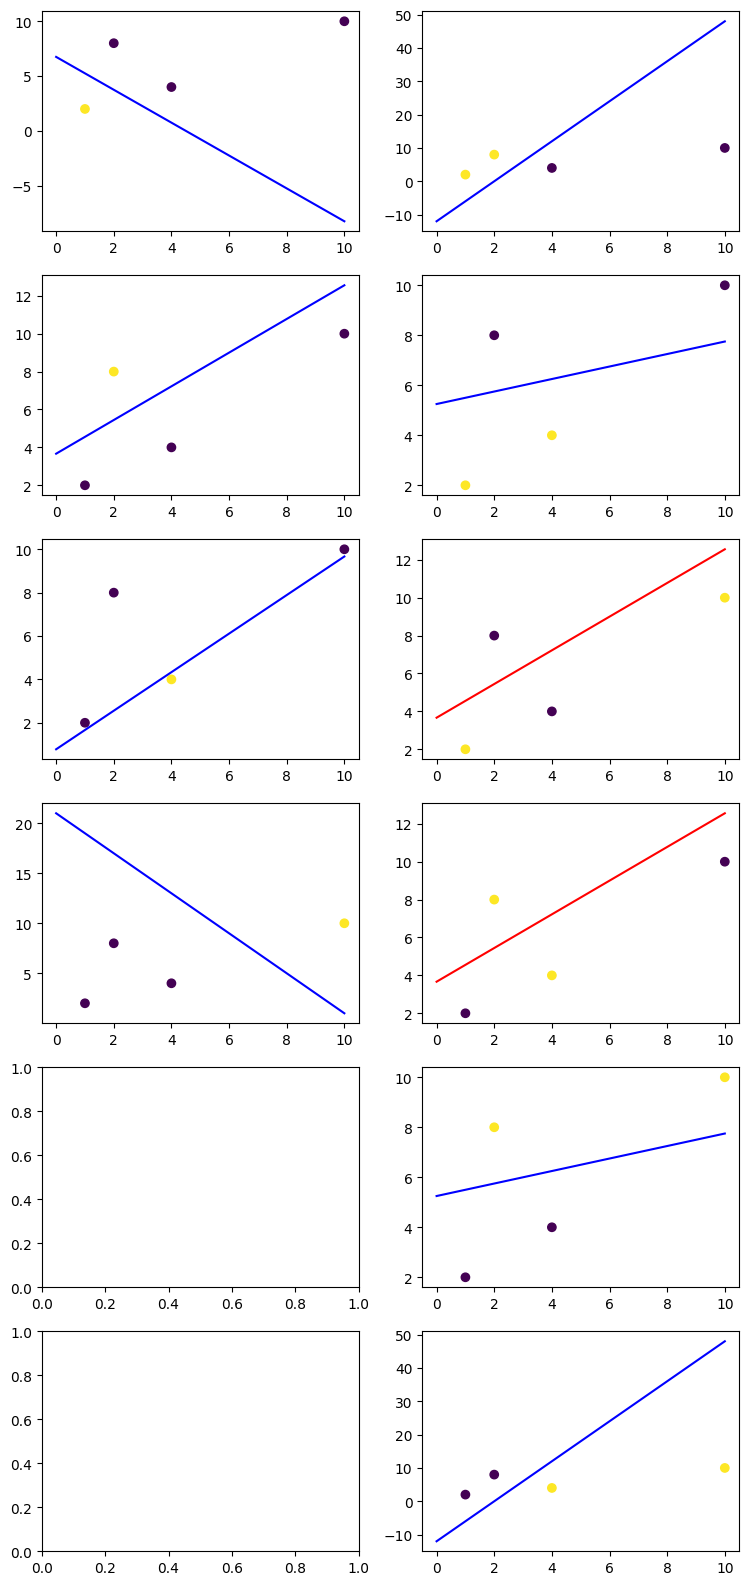

In [19]:
is_shattered2(2, 4, S_n)

### d)

In [31]:
results = []
N = 50
for d in range(2,11):
    for n in range(1,d+3):
        for _ in range(N):
            shattered = is_shattered(d, n, np.random.uniform(-1,1,size=(n,d)))
            if shattered:
                break

        if not shattered:
            break
        n += 1
        
    res = [d, n]
    results.append(res)

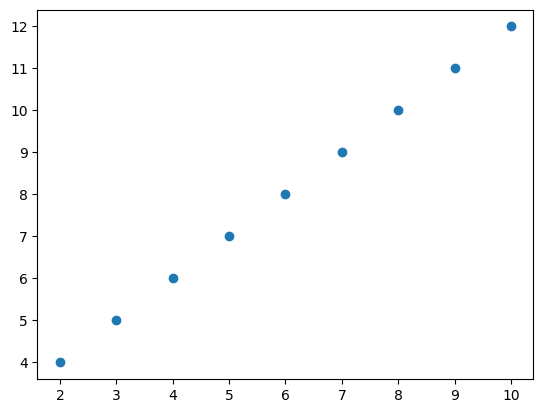

In [38]:
plt.scatter(np.array(results)[:,0], np.array(results)[:,1])

### e)

In [ ]:
# A hint: change a kernel in SVM